In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff


import matplotlib.pyplot as plt
import os

# Требования: 
- во всех графиках должны быть подписи чере title, legend, etc... 
- Убедитесь, что после сохранения ноутбука графики всё ещё видно, если открыть ноутбук заново, если не видно, то напишите мне @kirizhik 
- Можно баловаться с цветами, чтобы было **K P A C U B O**, но **не вырвеглазно**, пожалуйста

In [4]:
df = pd.read_csv('data.csv', index_col = 0)
def value(x):
    if x[-1] == 'M':
        return float(x[:-1])*1000
    elif x[-1] == 'K':
        return float(x[:-1])
    else:
        return float(x)/1000
def conv(x):
    if x == 'nan':
        return 170.0
    else:
        t = x.split("'")
        return (float(t[0])+float(t[1])/12)*30.48
i = 0
df1 = df['Value']
df2 = np.stack(np.vectorize(lambda x: x[1:])(df1), axis=0)
df3 = np.stack(np.vectorize(value)(df2), axis=0)
df['Value'] = df3
df['Weight'] = df['Weight'].str.slice(0, -3).astype(float)
df7 = df['Height'].apply(str)
df['Height'] = df7.apply(conv)
df1 = df['Wage']
df2 = np.stack(np.vectorize(lambda x: x[1:])(df1), axis=0)
df3 = np.stack(np.vectorize(value)(df2), axis=0)
df['Wage'] = df3

In [5]:
def conver(x):
    if x=='nan':
        return np.nan
    else:
        return float(x.split(' ')[-1])

df9 = df['Contract Valid Until'].astype(str)
df['Contract Valid Until'] = df9.apply(conver)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  float64
 11  Wage                      18207 non-null  float64
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [9]:
df.dtypes[df.dtypes == 'object'].shape[0]

40

In [10]:
df.columns.shape

(88,)

In [11]:

88-45

43

# Заполните пропуски в утверждениях 

- В датасете [88] переменных 

- Из них числовых [43]

(было до моих преобразований)

# Изучите распределение возростов с помощью Age [px.histogram](https://plotly.com/python/histograms/), изучите [более продвинутые методы](https://plotly.com/python/distplot/) визуализации распределений 

In [12]:
fig = px.histogram(df['Age'], x='Age', nbins=30, color_discrete_sequence=['indianred'])
fig.update_layout(
title='Распределение игроков по возрасту',
    title_x = 0.5)
fig.show()

# Визуализируйте соотношенеие между левшами и правшами (? сами найдите необходимую колонку в данных, считаем, что левша-правша ~ предпочтительная нога для ударов )

In [13]:
df1 = df['Preferred Foot']
t = np.sum(df1 == 'Right')
fig = px.histogram(df1,x='Preferred Foot')
fig.update_layout(
title=f'На каждого левшу в среднем приходится {int(t / (df1.shape[0] - t))} правши',
    title_x = 0.5)
fig.show()

# Визуализируйте Международный Рейтинг футболистов (International Reputation), ассоциирован ли он с национальностью? футбольным клубом? 

![Игроки](Players.png "Title")


In [14]:
df1 = df[['International Reputation','Nationality']]
fig = px.histogram(df1, x='International Reputation', color= 'Nationality')
fig.update_layout(
title='Распределение игроков по их IR и национальности',title_x = 0.5)
fig.show()

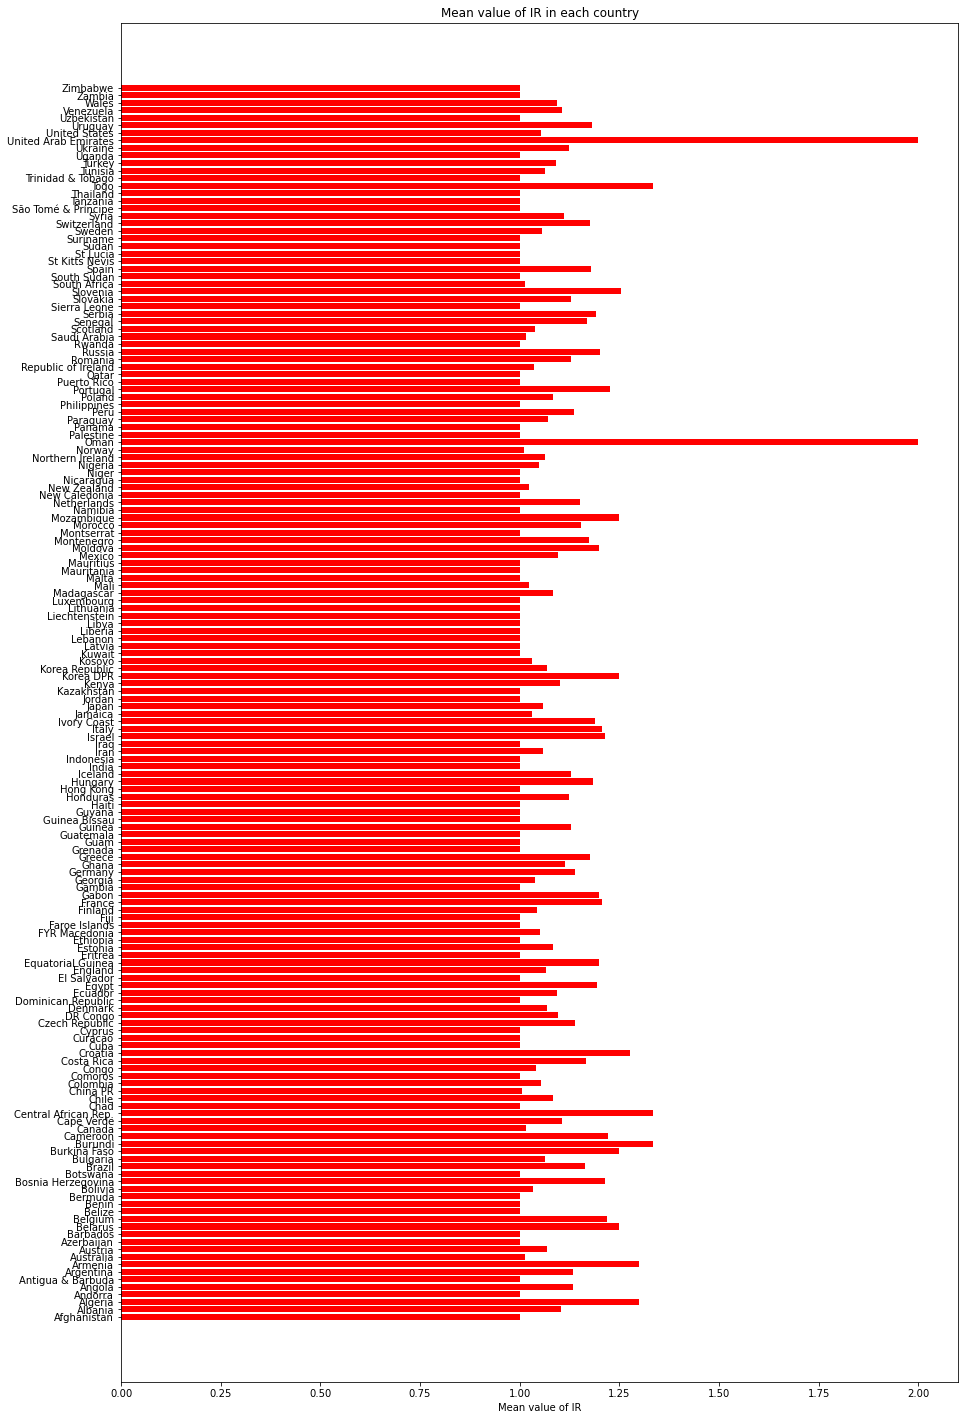

Как видно из графика, среднее значение IR у разных стран колеблется от 1 до 1.25


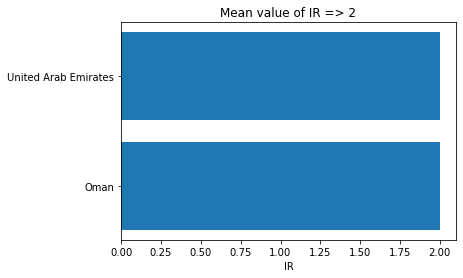

Кроме Oman and United Arab Emirates


In [15]:
df1 = df.groupby('Nationality')['International Reputation'].describe()
df1.index
plt.figure(figsize=[15,25])
pos = np.arange(len(df1.index))
val = df1['mean']
plt.barh(pos, val, align='center', color = 'r')
plt.yticks(pos, df1.index)
plt.title('Mean value of IR in each country')
plt.xlabel('Mean value of IR')
plt.show()
print('Как видно из графика, среднее значение IR у разных стран колеблется от 1 до 1.25')
plt.figure(1)
val1 = val[val > 1.75]
pos1 = [1, 2]
plt.barh(pos1, val1, align='center')
plt.yticks(pos1, val1.index)
plt.xlabel('IR')
plt.title('Mean value of IR => 2')
plt.show()
print('Кроме Oman and United Arab Emirates')

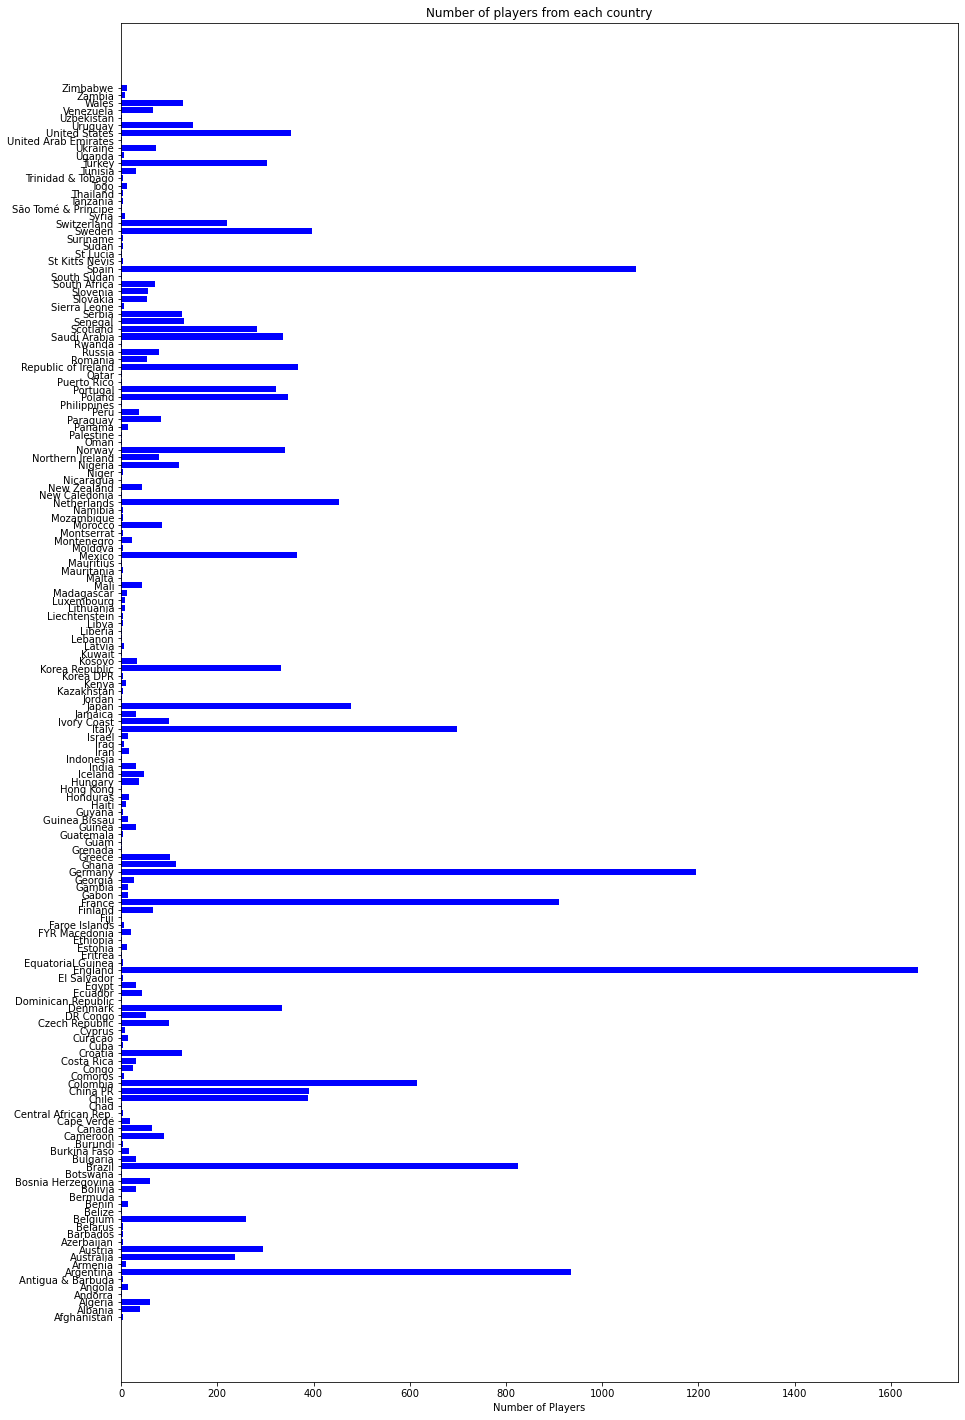

Из графика видно что из Oman and United Arab Emirates играет не больше 10 человек => их можно отнести к выбросам и не учитывать в общей картине
Можно сделать вывод, что IR не зависит от национальности


In [16]:
plt.figure(figsize=[15,25])
pos = np.arange(len(df1.index))
val = df1['count']
plt.barh(pos, val, align='center', color = 'b')
plt.title('Number of players from each country')
plt.yticks(pos, df1.index)
plt.xlabel('Number of Players')
plt.show()
print('Из графика видно что из Oman and United Arab Emirates играет не больше 10 человек => их можно отнести к выбросам и не учитывать в общей картине')
print('Можно сделать вывод, что IR не зависит от национальности')

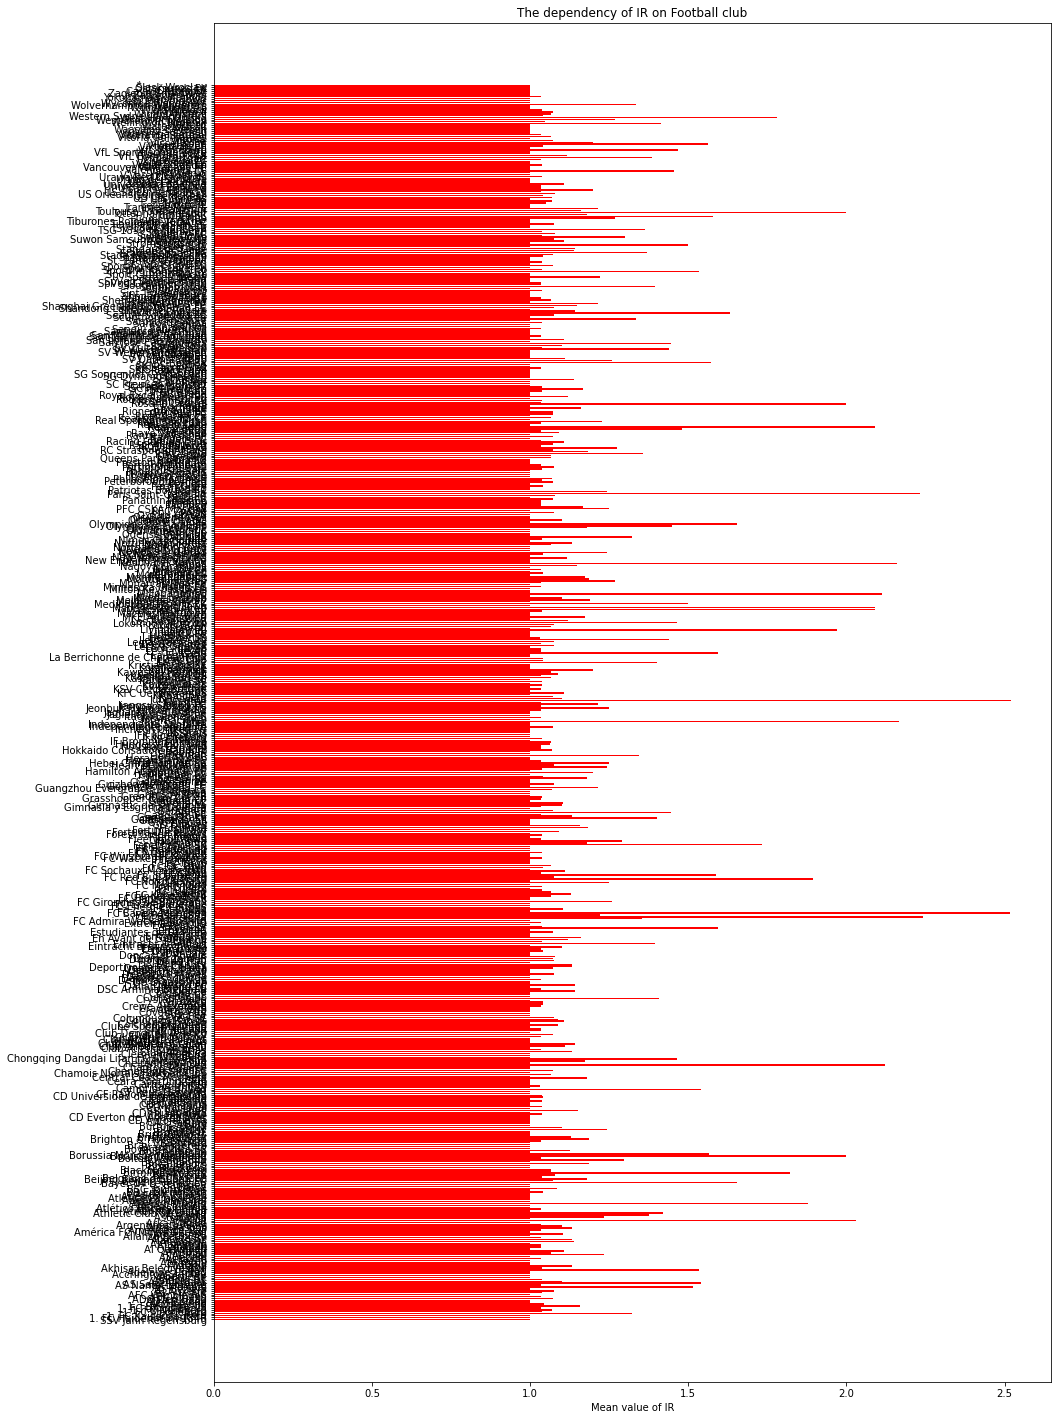

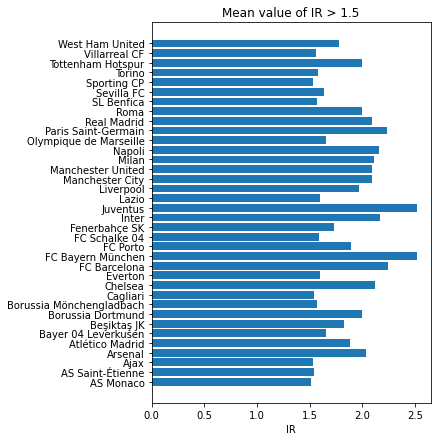

In [17]:
df1 = df.groupby('Club')['International Reputation'].describe()
df1.index
plt.figure(figsize=[15,25])
pos = np.arange(len(df1.index))
val = df1['mean']
plt.barh(pos, val, align='center', color = 'r')
plt.title('The dependency of IR on Football club')
plt.yticks(pos, df1.index)
plt.xlabel('Mean value of IR')
plt.show()
plt.figure(figsize = [5, 7])
val1 = val[val > 1.5]
pos1 = np.arange(len(val1))
plt.barh(pos1, val1, align='center')
plt.yticks(pos1, val1.index)
plt.xlabel('IR')
plt.title('Mean value of IR > 1.5')
plt.show()

In [18]:
print('В основном IR колеблется от 1 до 1.5, кроме приведенных выше клубов')
print('В какой-то мере, IR ассоциирован с клубом')

В основном IR колеблется от 1 до 1.5, кроме приведенных выше клубов
В какой-то мере, IR ассоциирован с клубом


# Есть ли зависимость между потенциалом (Potential) и Международным Рейтингом футболистов (International Reputation)? Визуализируте её. Влияет ли на потенциал игровая нога? Почему так может случиться? (картинка в тему)

![Коазуация или корреляция?](causuation.png "???")

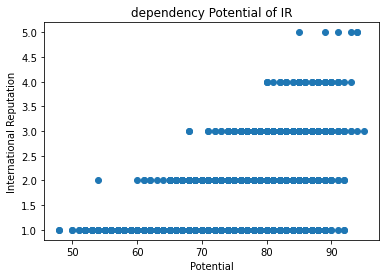

Как можно заметить если у игрока высокий IR => у него высокий потенциал
В обратную сторону, вообще говоря, неверно


In [19]:
X = np.array(df['Potential'])
Y = np.array(df['International Reputation'])
plt.scatter(X,Y)
plt.title('dependency Potential of IR')
plt.xlabel('Potential')
plt.ylabel('International Reputation')
plt.show()
print('Как можно заметить если у игрока высокий IR => у него высокий потенциал')
print('В обратную сторону, вообще говоря, неверно')

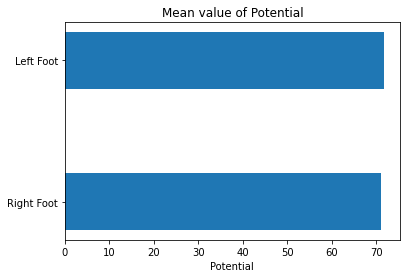

Как видно из графика, средний игрок-правша имеет такой же потенциал, как и средний игрок-левша
Т.е. предпочитаемая нога на потециал практически не влияет


In [20]:
Y = np.array(df['Preferred Foot'])
X = np.array(df['Potential'])
plt.figure(1)
pos = np.array([1, 3])
val = np.array([np.mean(X[Y == 'Right']), np.mean(X[Y == 'Left'])])
plt.barh(pos, val)
plt.yticks(pos, ('Right Foot', 'Left Foot'))
plt.xlabel('Potential')
plt.title('Mean value of Potential')
plt.show()
print('Как видно из графика, средний игрок-правша имеет такой же потенциал, как и средний игрок-левша')
print('Т.е. предпочитаемая нога на потециал практически не влияет')

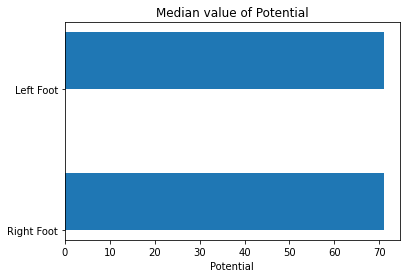

In [21]:
plt.figure(1)
pos = np.array([1, 3])
val = np.array([np.median(X[Y == 'Right']), np.median(X[Y == 'Left'])])
plt.barh(pos, val, align='edge')
plt.yticks(pos, ('Right Foot', 'Left Foot'))
plt.xlabel('Potential')
plt.title('Median value of Potential')
plt.show()


# Теперь пройдёмся по показателям игроков... 
### Есть ли зависимость Выносливости (Stamina) и Силы (Strength) игроков? какая? точно зависимость? 


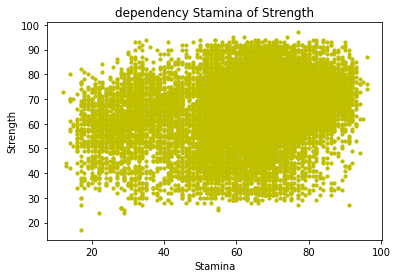

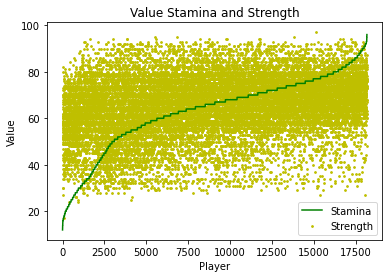

Видно из последнего графика, что чем выше выносливость, тем больше сила, в среднем для одного человека отношение
стамины к силе равно 1
Есть слабая прямая зависимость


In [22]:
df111 = df[['Stamina', 'Strength']]
df111 = df111.dropna(how='any')
X = df111['Stamina']
Y = df111['Strength']
plt.scatter(X,Y, c='y', s=10)
plt.title('dependency Stamina of Strength')
plt.xlabel('Stamina')
plt.ylabel('Strength')
plt.show()
X = np.array(X)
zap = np.argsort(X)
X.sort()
Y = np.array(Y)
Z = np.arange(len(Y))
plt.scatter(Z, Y[zap], c='y', s=3, label='Strength')
plt.plot(Z, X, c='g', label='Stamina')
plt.title('Value Stamina and Strength')
plt.ylabel('Value')
plt.xlabel('Player')
plt.legend()
plt.show()
print('Видно из последнего графика, что чем выше выносливость, тем больше сила, в среднем для одного человека отношение') 
print(f'стамины к силе равно {round(np.mean(X/Y))}')
print('Есть слабая прямая зависимость')

# Зависит ли Стоимость игрока стоимость (Value) игрока от его "финтов" (Skill Moves)? 

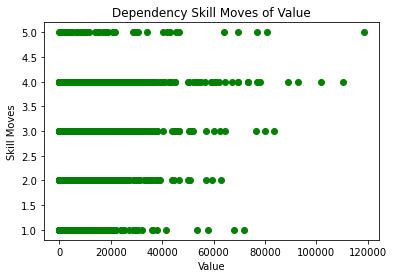

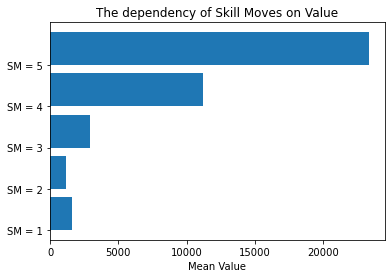

Как видно из последнего графика, чем больше у игрока Skill Moves, тем больше его стоимость


In [23]:
df1 = df['Value']
df2 = df['Skill Moves']
plt.scatter(df1, df2, c='g')
plt.title('Dependency Skill Moves of Value')
plt.xlabel('Value')
plt.ylabel('Skill Moves')
df3 = df.groupby('Skill Moves')['Value'].describe()['mean']
plt.show()
plt.figure(1)
pos = np.array([1, 2, 3, 4, 5])
val = np.array(df3)
plt.barh(pos, val, align='edge')
plt.yticks(pos, ('SM = 1', 'SM = 2', 'SM = 3', 'SM = 4', 'SM = 5'))
plt.xlabel('Mean Value')
plt.title('The dependency of Skill Moves on Value')
plt.show()
print('Как видно из последнего графика, чем больше у игрока Skill Moves, тем больше его стоимость')

# Покажите распределения основных характеристик игроков: Рост, Вес, Возраст по позициям (Position), сделайте выводы...


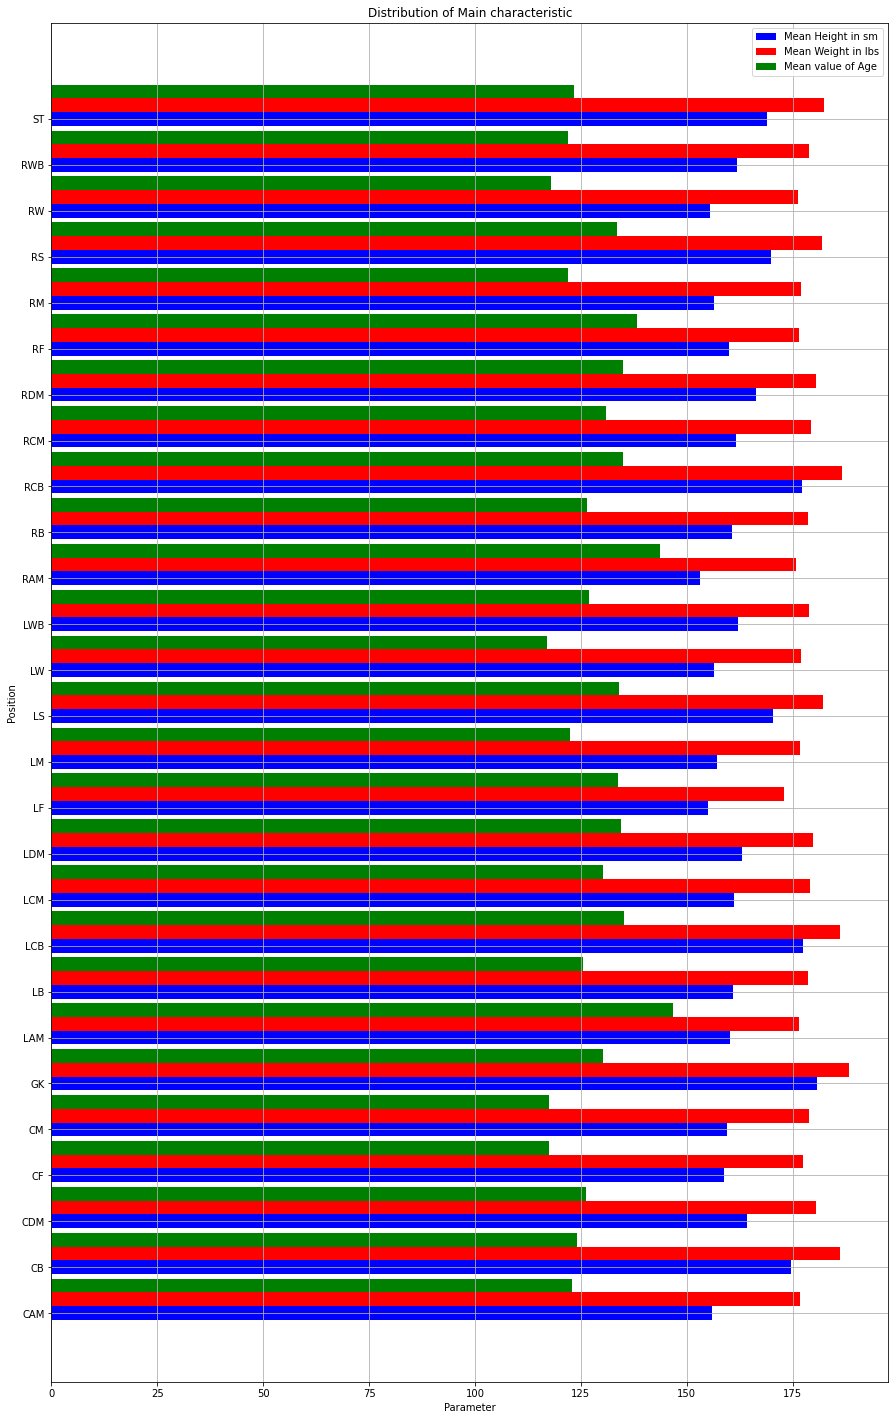

Из распределения видно, что для позиций RCB, LCB, GK и CB нужен довольно большой рост
На позициях RW, LW, CM, CF в основном играют футболисты помладше


In [29]:
val1 = df.groupby('Position')['Weight'].describe()['mean']
val2 = df.groupby('Position')['Height'].describe()['mean']
val3 = df.groupby('Position')['Age'].describe()['mean']
pos = np.arange(len(val1.index))
plt.figure(figsize=[15,25])
h=0.3
height = plt.barh(pos,val1, height=h, color='b')
weight = plt.barh(pos+h, val2, height=h, color='r')
age = plt.barh(pos+2*h, val3*5, height=h, color='g')
plt.yticks(pos, val1.index)
plt.xlabel('Parameter')
plt.ylabel('Position')
plt.title('Distribution of Main charaсteristic')

plt.legend( (height, weight, age), ('Mean Height in sm', 'Mean Weight in lbs', 'Mean value of Age') )
plt.grid(True)
plt.show()
print('Из распределения видно, что для позиций RCB, LCB, GK и CB нужен довольно большой рост')
print('На позициях RW, LW, CM, CF в основном играют футболисты помладше')

# Есть ли зависимость скорости (SprintSpeed) от веса и роста? А от национальности?  

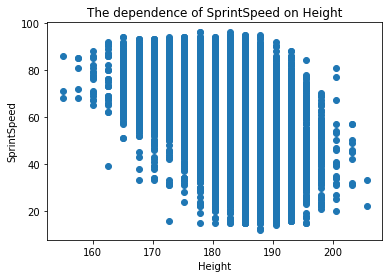

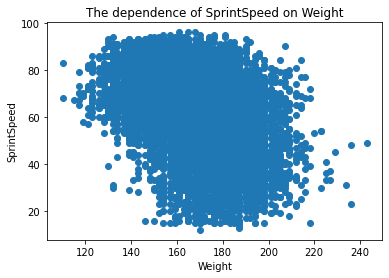

Как видно из графиков, скорость обратно пропорциональна высоте и массе
Убедимся, что это действительно так, проверив зависимость Height*Weight от скорости


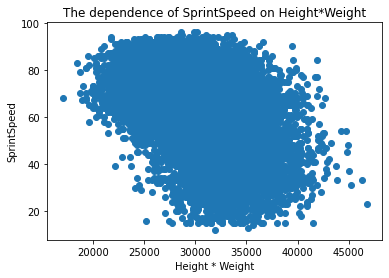

Выходит, что чем меньше высота и вес, тем больше скорость


In [329]:
X = df['Height']
Y = df['Weight']
Z = df['SprintSpeed']
plt.scatter(X,Z)
plt.title('The dependence of SprintSpeed on Height')
plt.xlabel('Height')
plt.ylabel('SprintSpeed')
plt.show()
plt.scatter(Y,Z)
plt.ylabel('SprintSpeed')
plt.xlabel('Weight')
plt.title('The dependence of SprintSpeed on Weight')
plt.show()
plt.scatter(X*Y,Z)
plt.title('The dependence of SprintSpeed on Height*Weight')
plt.ylabel('SprintSpeed')
plt.xlabel('Height * Weight')
print('Как видно из графиков, скорость обратно пропорциональна высоте и массе')
print('Убедимся, что это действительно так, проверив зависимость Height*Weight от скорости')
plt.show()
print('Выходит, что чем меньше высота и вес, тем больше скорость')

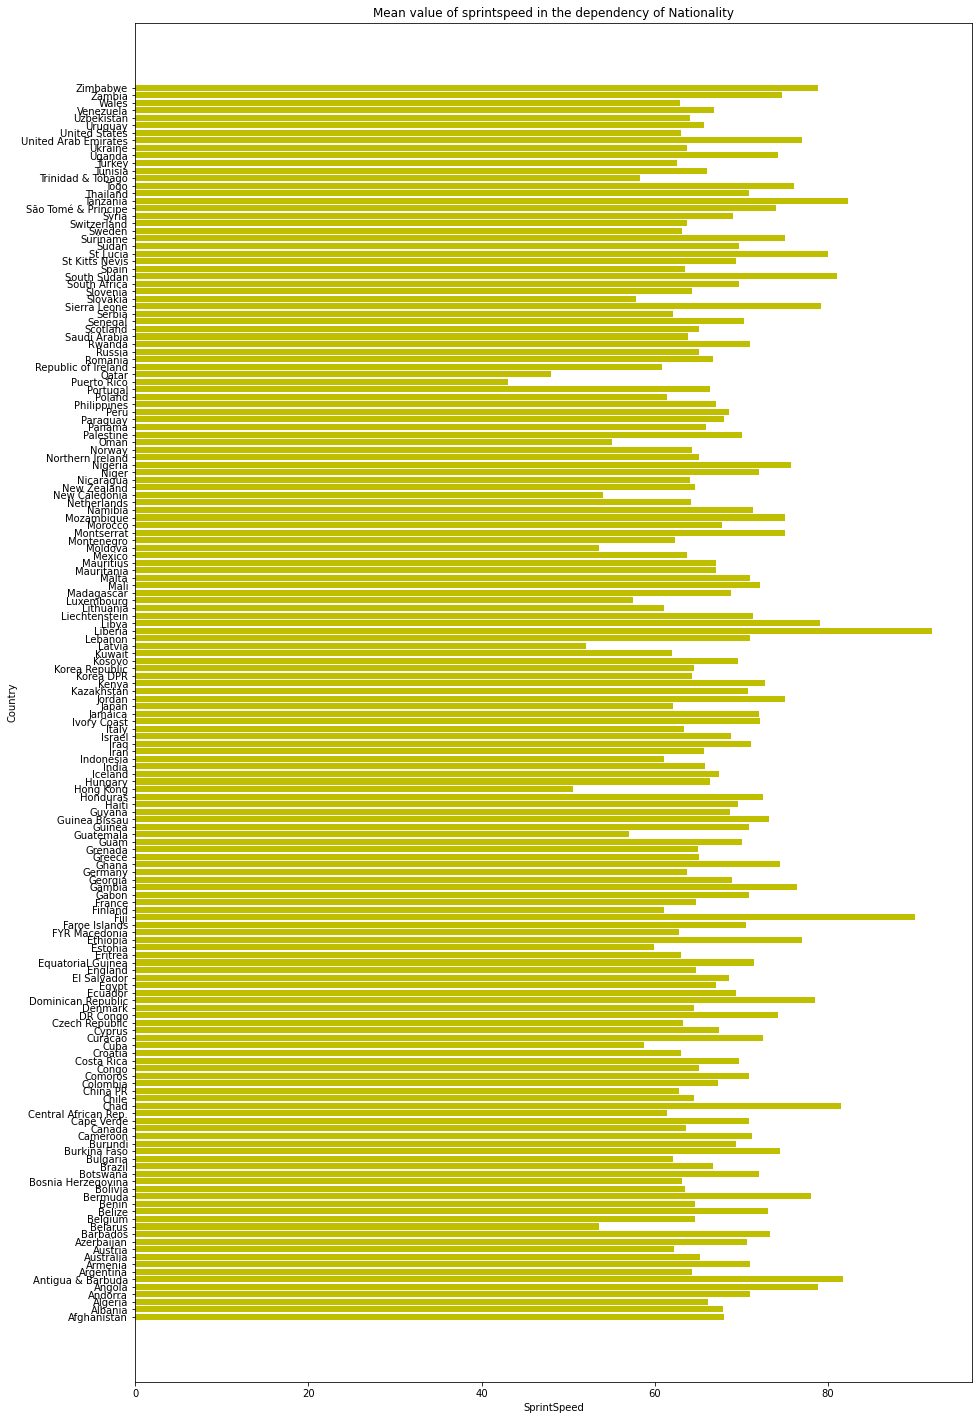

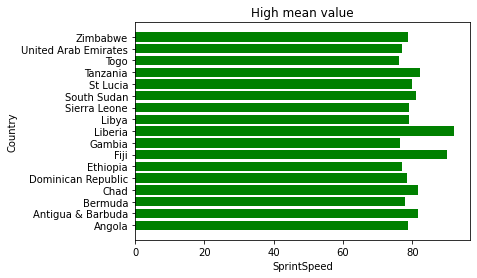

Выходцы из стран, показанных на последнем графике, обладают лучшей скоростью


In [40]:
vib = df[['SprintSpeed', 'Nationality']]
vib = vib.dropna(how='any')
d1 = vib.groupby('Nationality')['SprintSpeed'].mean()
pos = np.arange(d1.shape[0])
plt.figure(figsize=[15,25])
plt.barh(pos, d1, color='y')
plt.yticks(pos, d1.index)
plt.xlabel('SprintSpeed')
plt.ylabel('Country')
plt.title('Mean value of sprintspeed in the dependency of Nationality')
plt.show()
d2 = d1[d1 > 76]
pos1 = np.arange(d2.shape[0])
plt.barh(pos1, d2, color='g')
plt.xlabel('SprintSpeed')
plt.ylabel('Country')
plt.title('High mean value')
plt.yticks(pos1, d2.index)
plt.show()
print('Выходцы из стран, показанных на последнем графике, обладают лучшей скоростью')

# Под какими номерами чаще всего играют нападающие? Визуализируйте частотность  

In [41]:
g = df[df['Position'] == 'CF']
g = g['Jersey Number']
fig = px.histogram(g, nbins=40, x='Jersey Number')
fig.update_layout(
title='Jersey Number`s of CF',title_x = 0.5)
fig.show()
fig1 = px.histogram(g, nbins=100, x='Jersey Number')
fig1.update_layout(
title='Jersey Number`s of CF (More precisely)',title_x = 0.5)
fig1.show()
print('We can see, that preferred number at the CF is 17')

We can see, that preferred number at the CF is 17


# Есть ли за зависимость **силы удара** (ShotPower) от **ведущей ноги**? от **агрессивности** (Aggression)? 


Гистограма даёт понять, что сила удара у игроков с разными Preferred Foot распределена примерно одинаково


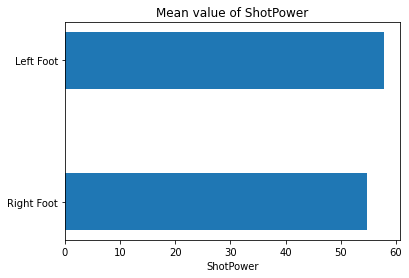

Видно, что средняя сила удара у левшей чуть больше
В целом можно сказать, что сила удара почти не зависит от предпочитаемой ноги


In [42]:
df11 = df[['ShotPower', 'Preferred Foot']]
df11 = df11.dropna(how='any', axis=0)
fig = px.histogram(df11, x = 'ShotPower', color='Preferred Foot')
fig.show()
print('Гистограма даёт понять, что сила удара у игроков с разными Preferred Foot распределена примерно одинаково')
Y = np.array(df['Preferred Foot'])
X = np.array(df['ShotPower'])
plt.figure(1)
pos = np.array([1, 3])
val = np.array([np.mean(X[Y == 'Right']), np.mean(X[Y == 'Left'])])
plt.barh(pos, val)
plt.yticks(pos, ('Right Foot', 'Left Foot'))
plt.xlabel('ShotPower')
plt.title('Mean value of ShotPower')
plt.show()
print('Видно, что средняя сила удара у левшей чуть больше')
print('В целом можно сказать, что сила удара почти не зависит от предпочитаемой ноги')

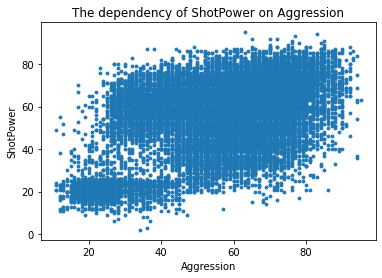

Заметно, что в среднем отношение агрессии к силе удара = 1 => эти параметры прямо пропорционально зависимы


In [43]:
x = df['Aggression']
y = df['ShotPower']
plt.scatter(x,y,s=8)
plt.title('The dependency of ShotPower on Aggression')
plt.ylabel('ShotPower')
plt.xlabel('Aggression')
plt.show()
c=y/x
fig1 = px.histogram(c)
fig1.update_layout(
title='Зависимость силы удара от агрессии',title_x = 0.5, xaxis_title = 'ShotPower/Agression')
fig1.show()
print('Заметно, что в среднем отношение агрессии к силе удара = 1 => эти параметры прямо пропорционально зависимы')

# Найдите суммарную стоимость игроков в каждом клубе. Визуализируйте соотношение сумарной стоимости топ 10 клубов. 

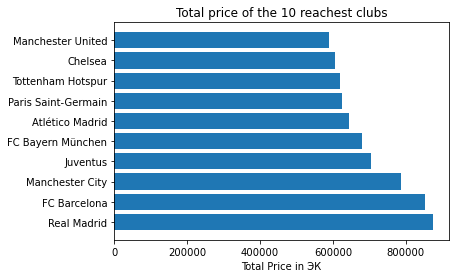

In [44]:
df12 = df.groupby('Club')['Value'].sum().sort_values(ascending = False)[:10]
plt.figure(3)
pos = np.arange(len(df12.index))
val = df12
plt.barh(pos, val)
plt.yticks(pos, df12.index)
plt.xlabel('Total Price in ЭК')
plt.title('Total price of the 10 reachest clubs')
plt.show()

# Есть ли зависимость между продолжительностью контракта игрока и его стоимость? 

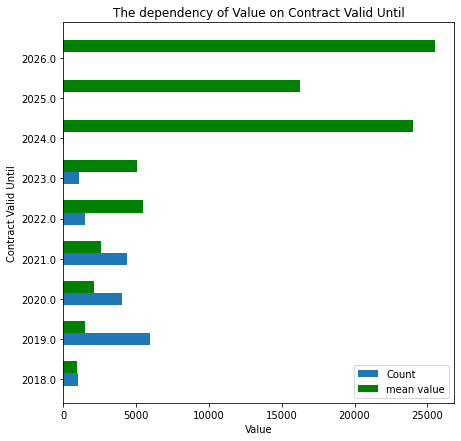

Можно сделать вывод - чем дольше у игрока контракт, тем больше он стоит


In [45]:
dfd = df[['Value', 'Contract Valid Until']]
dfd = dfd.dropna(how='any')
dfl=dfd.groupby('Contract Valid Until')['Value'].describe()
'''X = np.array(dfd['Value'])
Y = np.array(dfd['Contract Valid Until'])
Z1 = np.argsort(X)
X.sort()
Z = np.arange(len(X))
plt.plot(Z,X,color='g')
plt.scatter(Z, Y[Z], s=4,color='b')
plt.show()'''
plt.figure(figsize=[7,7])
h =0.3
pos = np.arange(len(dfl.index))
val = dfl['count']
count = plt.barh(pos, val, height=h)
value = plt.barh(pos+h, dfl['mean'], height=h, color='g')
plt.yticks(pos, dfl.index)
plt.xlabel('Value')
plt.ylabel('Contract Valid Until')
plt.title('The dependency of Value on Contract Valid Until')
plt.legend((count, value), ('Count', 'mean value'))
plt.show()
print('Можно сделать вывод - чем дольше у игрока контракт, тем больше он стоит')

# В какой год будет больше всего свободных игроков на рынке (исходя из этих данных)? визуализируйте зависимость 

In [46]:
df5 = df['Contract Valid Until'].dropna()
fig = px.histogram(df5)
fig.show()
print('В 2019-2020 годах было больше всего игроков на рынке - почти 6000 из нашей выборки')

В 2019-2020 годах было больше всего игроков на рынке - почти 6000 из нашей выборки


# Есть ли зависмость потенциала (Potential) игрока от возраста? Всегда ли молодые игроки обладают большим потенциалом? 

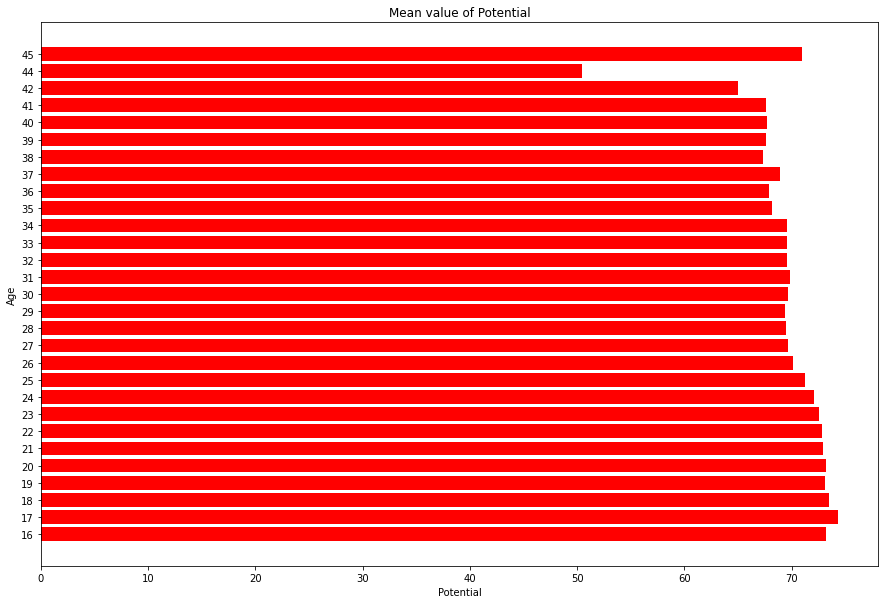

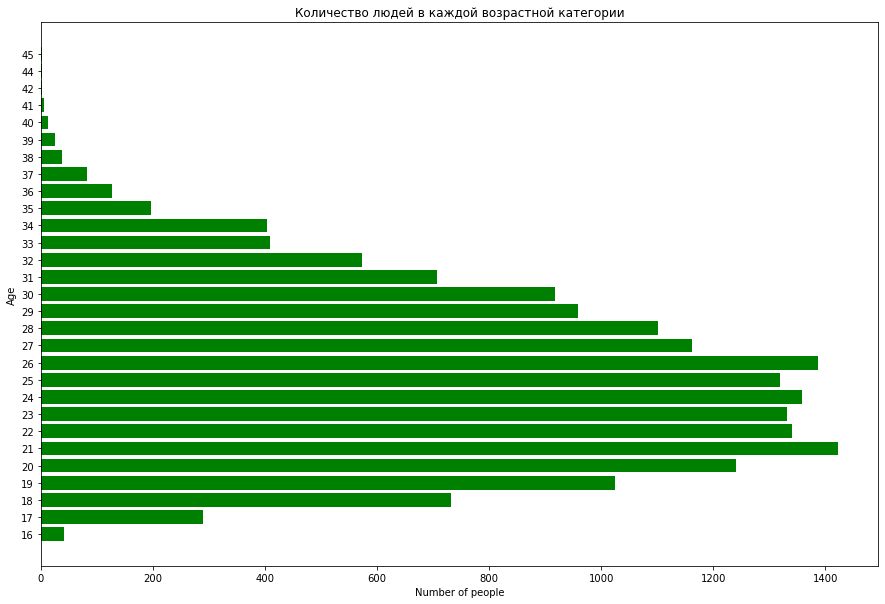

Как видно из нижнего графика, количество игроков старше 42 меньше 10-ти - их можно считать выбросами
Из верхнего графика понятно, что у людей младше 24 лет в среднем потенциал выше, чем у их старших коллег


In [47]:
dfc = df[['Potential', 'Age']]
dfc = dfc.dropna(how='any')
dfc = dfc.groupby('Age')['Potential'].describe()
pos = np.arange(dfc.shape[0])
plt.figure(figsize=[15,10])
plt.barh(pos, dfc['mean'], color='r')
plt.yticks(pos, dfc.index)
plt.ylabel('Age')
plt.xlabel('Potential')
plt.title('Mean value of Potential')
plt.show()
plt.figure(figsize=[15,10])
plt.barh(pos, dfc['count'], color = 'g')
plt.yticks(pos, dfc.index)
plt.ylabel('Age')
plt.xlabel('Number of people')
plt.title('Количество людей в каждой возрастной категории')
plt.show()
print('Как видно из нижнего графика, количество игроков старше 42 меньше 10-ти - их можно считать выбросами')
print('Из верхнего графика понятно, что у людей младше 24 лет в среднем потенциал выше, чем у их старших коллег')

# Есть ли зависимость рейтинга игрока (Overall) от возраста? Когда у игроков "пик" карьеры? Игроков какого возраста больше всего с рейтингом 90+?  

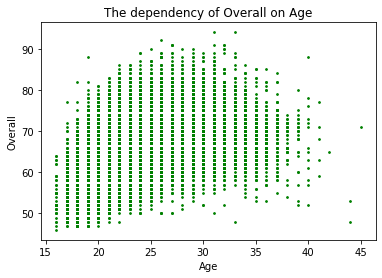

Из графика не совсем понятна зависимость, отобразим среднее значение рейтинга в каждой возрастной категории:


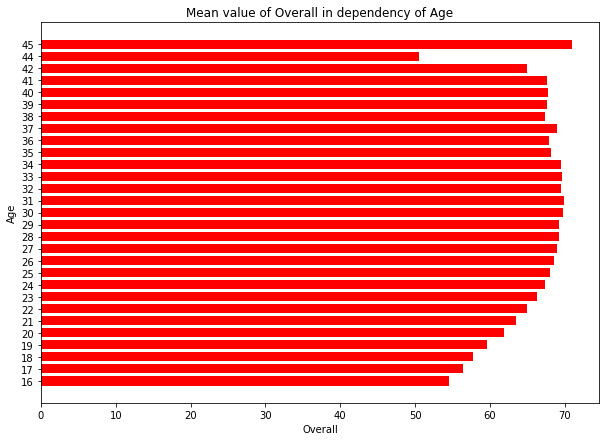

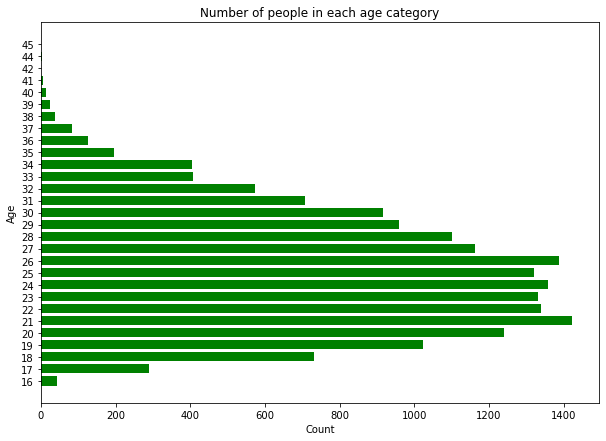

Заметно, что пик карьеры приходится на 29-30 лет, а т.к. данных футболистов с этим возрастом у нас достаточно много, то можно считать, что средний график отображает зависимость, приближенную к реальной


In [48]:
dff = df[['Overall', 'Age']]
dff = dff.dropna(how='any')
X = np.array(dff['Age'])
Y = np.array(dff['Overall'])
plt.scatter(X,Y, s=3, c='g')
plt.title('The dependency of Overall on Age')
plt.xlabel('Age')
plt.ylabel('Overall')
plt.show()
print('Из графика не совсем понятна зависимость, отобразим среднее значение рейтинга в каждой возрастной категории:')
dff = dff.groupby('Age')['Overall'].describe()
pos = np.arange(dff.shape[0])
plt.figure(figsize=[10,7])
plt.ylabel('Age')
plt.barh(pos, dff['mean'], color='r')
plt.yticks(pos, dff.index)
plt.title('Mean value of Overall in dependency of Age')
plt.xlabel('Overall')
plt.show()
plt.figure(figsize=[10,7])
plt.barh(pos, dff['count'], color='g')
plt.yticks(pos, dff.index)
plt.xlabel('Count')
plt.ylabel('Age')
plt.title('Number of people in each age category')
plt.show()
print('Заметно, что пик карьеры приходится на 29-30 лет, а т.к. данных футболистов с этим возрастом у нас достаточно много, то можно считать, что средний график отображает зависимость, приближенную к реальной')

In [49]:
dfg = df[['Overall', 'Age']]
dfg = dfg[dfg['Overall'] > 89]
dfg = dfg.dropna(how='any')
fig = px.histogram(dfg['Age'], x='Age', nbins=15)
fig.show()
print('В нашей выборке среди игроков в возрасте 32-х лет больше всего футболистов с рейтингом 90+')

В нашей выборке среди игроков в возрасте 32-х лет больше всего футболистов с рейтингом 90+


# Насколько средняя зарплата (Wage) игроков с рейтингом (Overall) 90+ больше средней зарплаты с рейтингом [80 - 90]? Визуализируйте возможную зависимость

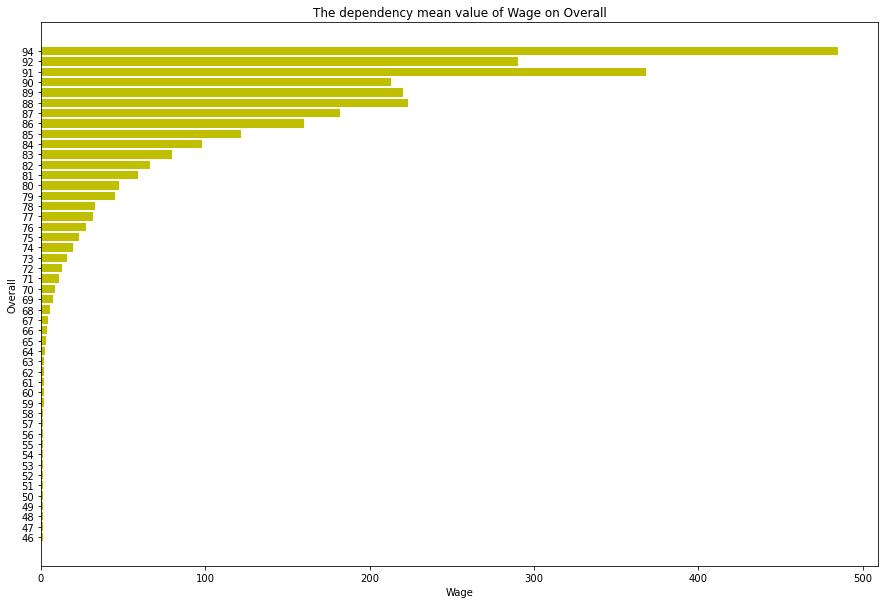

Из графика видно, что зависимость похожа на экспоненциальную: при приближении Overall к 80
график начинает стремительно расти


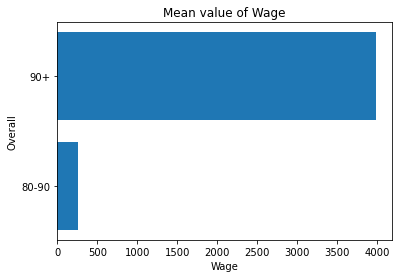

В среднем ЗП игрока с рейтингом 90+ больше ЗП игрока с рейтингом 80-90 на Э3727K


In [50]:
dff = df[['Overall', 'Wage']]
dff = dff.dropna(how='any')
dft = dff.groupby('Overall')['Wage'].mean()
pos = np.arange(dft.shape[0])
plt.figure(figsize=[15,10])
plt.barh(pos, dft, color='y')
plt.yticks(pos, dft.index)
plt.xlabel('Wage')
plt.title('The dependency mean value of Wage on Overall')
plt.ylabel('Overall')
plt.show()
print('Из графика видно, что зависимость похожа на экспоненциальную: при приближении Overall к 80') 
print('график начинает стремительно расти')

dff1 = dff.groupby('Overall')['Wage'].describe()
dff1['sum'] = t
dff1.drop('mean', axis=1, inplace=True)
dff1.drop('std', axis=1, inplace=True)
dff1.drop('min', axis=1, inplace=True)
dff1.drop('25%', axis=1, inplace=True)
dff1.drop('50%', axis=1, inplace=True)
dff1.drop('75%', axis=1, inplace=True)
dff1.drop('max', axis=1, inplace=True)
df2 = dff1[(dff1.index > 79)&(dff1.index < 90)]
df3 = dff1[dff1.index > 89]
df3 = np.sum(np.array(df3), axis=0)
df2 = np.sum(np.array(df2), axis=0)
df4 = np.vstack((df2, df3))
df4 = df4.T
df4 = df4[1]/df4[0]
plt.barh([1,2], df4)
plt.yticks([1,2], ('80-90', '90+'))
plt.ylabel('Overall')
plt.xlabel('Wage')
plt.title('Mean value of Wage')
plt.show()
print(f'В среднем ЗП игрока с рейтингом 90+ больше ЗП игрока с рейтингом 80-90 на Э{int(df4[1]-df4[0])}K')